In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from scipy.stats import norm
from sklearn.pipeline import Pipeline

import statistics
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv('USA_construction_cost_of _healthcare_project.csv')

In [3]:
df2 = pd.read_csv('Total Production in Building and Construction Sector.csv')

In [4]:
df

County Data Generation Date  OSHPD Project Status  \
0          01 - Alameda            9/30/2013             In Review   
1          01 - Alameda            9/30/2013  Pending Construction   
2          01 - Alameda            9/30/2013       In Construction   
3          01 - Alameda            9/30/2013            In Closure   
4     07 - Contra Costa            9/30/2013             In Review   
...                 ...                  ...                   ...   
4539       56 - Ventura            6/16/2016            In Closure   
4540          57 - Yolo            6/16/2016             In Review   
4541          57 - Yolo            6/16/2016  Pending Construction   
4542          57 - Yolo            6/16/2016       In Construction   
4543          57 - Yolo            6/16/2016            In Closure   

     Total Costs of OSHPD Projects  Number of OSHPD Projects  \
0                     $50914315.00                        45   
1                    $840182510.04                       126   
2                    $994352932.29                       181   
3                     $65255928.88                        81   
4                     $19067925.00                        28   
...                            ...                       ...   
4539                  $18210257.00                        11   
4540                   $4405500.00                         6   
4541                    $680700.00                         7   
4542                   $6919172.00                        14   
4543                    $315970.00                         2   

            Collection of Counties  
0                Bay Area Counties  
1                Bay Area Counties  
2                Bay Area Counties  
3                Bay Area Counties  
4                Bay Area Counties  
...                            ...  
4539  Greater Los Angeles Counties  
4540   Greater Sacramento Counties  
4541   Greater Sacramento Counties  
4542   Greater Sacramento Counties  
4543   Greater Sacramento Counties  

[4544 rows x 6 columns]

In [5]:
df2

STATISTIC                                    Statistic Label  TLIST(Q1)  \
0     BEQ04C01  Value of Production Index in Building and Cons...      20001   
1     BEQ04C01  Value of Production Index in Building and Cons...      20001   
2     BEQ04C01  Value of Production Index in Building and Cons...      20001   
3     BEQ04C01  Value of Production Index in Building and Cons...      20001   
4     BEQ04C01  Value of Production Index in Building and Cons...      20001   
...        ...                                                ...        ...   
1835  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1836  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1837  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1838  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1839  BEQ04C04  Volume of Production Index in Building and Con...      20224   

     Quarter C02402V02895       Type of Building and Construction  \
0     2000Q1            -           All building and construction   
1     2000Q1           11  Building (excluding civil engineering)   
2     2000Q1          111                    Residential building   
3     2000Q1          112                Non-residential building   
4     2000Q1           12                       Civil engineering   
...      ...          ...                                     ...   
1835  2022Q4            -           All building and construction   
1836  2022Q4           11  Building (excluding civil engineering)   
1837  2022Q4          111                    Residential building   
1838  2022Q4          112                Non-residential building   
1839  2022Q4           12                       Civil engineering   

               UNIT       VALUE  
0     Base 2015=100  143.514977  
1     Base 2015=100  182.795802  
2     Base 2015=100  279.281551  
3     Base 2015=100  115.359508  
4     Base 2015=100   60.438887  
...             ...         ...  
1835  Base 2015=100  125.102539  
1836  Base 2015=100  126.742285  
1837  Base 2015=100  108.239693  
1838  Base 2015=100  130.098153  
1839  Base 2015=100  106.368237  

[1840 rows x 8 columns]

In [6]:
print('USA dataframe shape',df.shape)
print('Ireland dataframe shape',df2.shape)

USA dataframe shape (4544, 6)
Ireland dataframe shape (1840, 8)


# Exploratory  Data Analysis

# Dataset 1

In [7]:
df.shape

(4544, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   County                         4544 non-null   object
 1   Data Generation Date           4544 non-null   object
 2   OSHPD Project Status           4544 non-null   object
 3   Total Costs of OSHPD Projects  4544 non-null   object
 4   Number of OSHPD Projects       4544 non-null   int64 
 5   Collection of Counties         4544 non-null   object
dtypes: int64(1), object(5)
memory usage: 213.1+ KB


In [9]:
# we don't have null values on first dataset
df.isna().sum()

County                           0
Data Generation Date             0
OSHPD Project Status             0
Total Costs of OSHPD Projects    0
Number of OSHPD Projects         0
Collection of Counties           0
dtype: int64

In [10]:
# rename the columns
df.rename(columns = {'County': 'county', 'Data Generation Date': 'year','OSHPD Project Status': 'project_status', 'Total Costs of OSHPD Projects': 'cost','Number of OSHPD Projects': 'no_project','Collection of Counties':'Coll_of_counties'}, inplace= True)

In [11]:
# make sequence for columns
columns = ['year','county','no_project','project_status','Coll_of_counties','cost']

In [12]:
# change the sequence of the features
df= df[columns]

In [13]:
# You see there is few unique dates which is not usefull for time series analysis so i just get year from this column in the next step
df['year'].unique()

array(['9/30/2013', '10/8/2013', '10/31/2013', '11/14/2013', '11/26/2013',
       '12/12/2013', '12/31/2013', '1/21/2014', '1/30/2014', '2/14/2014',
       '3/3/2014', '3/19/2014', '4/7/2014', '4/21/2014', '5/9/2014',
       '5/22/2014', '6/9/2014', '6/23/2014', '7/3/2014', '7/17/2014',
       '7/30/2014', '8/14/2014', '8/28/2014', '9/12/2014', '9/24/2014',
       '10/8/2014', '10/23/2014', '11/7/2014', '11/21/2014', '12/1/2014',
       '12/15/2014', '12/23/2014', '1/5/2015', '1/15/2015', '1/29/2015',
       '2/12/2015', '2/26/2015', '3/13/2015', '3/27/2015', '4/9/2015',
       '4/23/2015', '5/7/2015', '5/21/2015', '6/4/2015', '6/18/2015',
       '7/2/2015', '7/20/2015', '7/30/2015', '8/12/2015', '8/27/2015',
       '9/9/2015', '9/24/2015', '10/8/2015', '10/22/2015', '11/5/2015',
       '11/19/2015', '12/3/2015', '12/17/2015', '12/31/2015', '1/14/2016',
       '1/28/2016', '2/11/2016', '2/29/2016', '3/10/2016', '3/24/2016',
       '4/7/2016', '4/21/2016', '5/5/2016', '5/19/2016', '6/1/

In [14]:
# i just need the year from the data column so i just extracted the year from it
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.strftime('%Y')

In [15]:
# collection of counties column are not usefull and have no insights for my assessment so i drop this column
df.drop('Coll_of_counties',axis=1,inplace=True)

In [16]:
df.head()

year             county  no_project        project_status           cost
0  2013       01 - Alameda          45             In Review   $50914315.00
1  2013       01 - Alameda         126  Pending Construction  $840182510.04
2  2013       01 - Alameda         181       In Construction  $994352932.29
3  2013       01 - Alameda          81            In Closure   $65255928.88
4  2013  07 - Contra Costa          28             In Review   $19067925.00

In [17]:
df2.head()

STATISTIC                                    Statistic Label  TLIST(Q1)  \
0  BEQ04C01  Value of Production Index in Building and Cons...      20001   
1  BEQ04C01  Value of Production Index in Building and Cons...      20001   
2  BEQ04C01  Value of Production Index in Building and Cons...      20001   
3  BEQ04C01  Value of Production Index in Building and Cons...      20001   
4  BEQ04C01  Value of Production Index in Building and Cons...      20001   

  Quarter C02402V02895       Type of Building and Construction           UNIT  \
0  2000Q1            -           All building and construction  Base 2015=100   
1  2000Q1           11  Building (excluding civil engineering)  Base 2015=100   
2  2000Q1          111                    Residential building  Base 2015=100   
3  2000Q1          112                Non-residential building  Base 2015=100   
4  2000Q1           12                       Civil engineering  Base 2015=100   

        VALUE  
0  143.514977  
1  182.795802  
2  279.281551  
3  115.359508  
4   60.438887

In [18]:
# count unique values from all features
print(df.nunique())

# show all unique values from all features
for i in df.columns:
    print(i)
    print(df[i].unique())

year                 4
county              16
no_project         405
project_status       4
cost              3675
dtype: int64
year
['2013' '2014' '2015' '2016']
county
['01 - Alameda' '07 - Contra Costa' '09 - El Dorado' '19 - Los Angeles'
 '21 - Marin' '28 - Napa' '30 - Orange' '31 - Placer' '34 - Sacramento'
 '38 - San Francisco' '41 - San Mateo' '43 - Santa Clara' '48 - Solano'
 '49 - Sonoma' '56 - Ventura' '57 - Yolo']
no_project
[ 45 126 181  81  28  43  56  20   6   2   5   4 439 564 868 629  17   9
  21  18   3   8  15  22  99 120 132 189   7  16  36 119  64  67 139 102
  30  72  38  71 168 140  13  11  29  14  23  46  19  37  65  51  44 125
  82 434 568 843 655  12  98 121 133 191  63 136 101  32  42  80 165 141
  24  35  53  50 182  79  27  59   1 410 506 855 677 143 199  39 127  62
  61  73 160 130  34  55 123 184  74  57 421 853 693 145 204 100  75 154
 186  26  47 432 498 856 709 147 206  10  40  58  66  25  76  60 151 134
  41  68 187 436 508 848 732  85 211 118 150 124 

In [19]:
df.dtypes

year              object
county            object
no_project         int64
project_status    object
cost              object
dtype: object

Changing the datatype of columns

In [20]:
# Remove unusual characters from county column
c = df['county'].copy()
c = c.astype(str)
c = c.str[4:]
df['county'] = c

In [21]:
# remove $ sign from cost columm and convert its datatype to float
u = df['cost'].copy()
u = u.astype(str)
u = u.str[1:]
df['cost'] = pd.to_numeric(u, errors='coerce').astype(float)

In [22]:
print(df['cost'][5])

19570172.0


In [23]:
df['year'] = df['year'].astype(int)

In [24]:
df.dtypes

year                int32
county             object
no_project          int64
project_status     object
cost              float64
dtype: object

# Dataset 2

In [25]:
df2

STATISTIC                                    Statistic Label  TLIST(Q1)  \
0     BEQ04C01  Value of Production Index in Building and Cons...      20001   
1     BEQ04C01  Value of Production Index in Building and Cons...      20001   
2     BEQ04C01  Value of Production Index in Building and Cons...      20001   
3     BEQ04C01  Value of Production Index in Building and Cons...      20001   
4     BEQ04C01  Value of Production Index in Building and Cons...      20001   
...        ...                                                ...        ...   
1835  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1836  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1837  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1838  BEQ04C04  Volume of Production Index in Building and Con...      20224   
1839  BEQ04C04  Volume of Production Index in Building and Con...      20224   

     Quarter C02402V02895       Type of Building and Construction  \
0     2000Q1            -           All building and construction   
1     2000Q1           11  Building (excluding civil engineering)   
2     2000Q1          111                    Residential building   
3     2000Q1          112                Non-residential building   
4     2000Q1           12                       Civil engineering   
...      ...          ...                                     ...   
1835  2022Q4            -           All building and construction   
1836  2022Q4           11  Building (excluding civil engineering)   
1837  2022Q4          111                    Residential building   
1838  2022Q4          112                Non-residential building   
1839  2022Q4           12                       Civil engineering   

               UNIT       VALUE  
0     Base 2015=100  143.514977  
1     Base 2015=100  182.795802  
2     Base 2015=100  279.281551  
3     Base 2015=100  115.359508  
4     Base 2015=100   60.438887  
...             ...         ...  
1835  Base 2015=100  125.102539  
1836  Base 2015=100  126.742285  
1837  Base 2015=100  108.239693  
1838  Base 2015=100  130.098153  
1839  Base 2015=100  106.368237  

[1840 rows x 8 columns]

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STATISTIC                          1840 non-null   object 
 1   Statistic Label                    1840 non-null   object 
 2   TLIST(Q1)                          1840 non-null   int64  
 3   Quarter                            1840 non-null   object 
 4   C02402V02895                       1840 non-null   object 
 5   Type of Building and Construction  1840 non-null   object 
 6   UNIT                               1840 non-null   object 
 7   VALUE                              1840 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 115.1+ KB


In [27]:
# drop unusual columns
df2.drop(['Quarter','C02402V02895','UNIT'], axis=1,inplace=True)

In [28]:
df2.rename(columns = {'STATISTIC':'statistic','TLIST(Q1)':'year','Statistic Label':'stats_label','VALUE':'price','Type of Building and Construction':'construction_type'},inplace = True)

In [29]:
uni_values = df2['stats_label'].unique()

In [30]:
df2['stats_label'].replace(to_replace=uni_values,
value= ['production_value','production_volume','seasonally_prod_value','seasonally_prod_volume'],
inplace=True)

In [31]:
x = df2['year'].astype(str)
x = x.str[:4]
df2['year'] = x.astype(int)

In [32]:
df2

statistic             stats_label  year  \
0     BEQ04C01        production_value  2000   
1     BEQ04C01        production_value  2000   
2     BEQ04C01        production_value  2000   
3     BEQ04C01        production_value  2000   
4     BEQ04C01        production_value  2000   
...        ...                     ...   ...   
1835  BEQ04C04  seasonally_prod_volume  2022   
1836  BEQ04C04  seasonally_prod_volume  2022   
1837  BEQ04C04  seasonally_prod_volume  2022   
1838  BEQ04C04  seasonally_prod_volume  2022   
1839  BEQ04C04  seasonally_prod_volume  2022   

                           construction_type       price  
0              All building and construction  143.514977  
1     Building (excluding civil engineering)  182.795802  
2                       Residential building  279.281551  
3                   Non-residential building  115.359508  
4                          Civil engineering   60.438887  
...                                      ...         ...  
1835           All building and construction  125.102539  
1836  Building (excluding civil engineering)  126.742285  
1837                    Residential building  108.239693  
1838                Non-residential building  130.098153  
1839                       Civil engineering  106.368237  

[1840 rows x 5 columns]

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   statistic          1840 non-null   object 
 1   stats_label        1840 non-null   object 
 2   year               1840 non-null   int32  
 3   construction_type  1840 non-null   object 
 4   price              1840 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 64.8+ KB


# Perform visualization on dataset

<Axes: xlabel='price', ylabel='Count'>

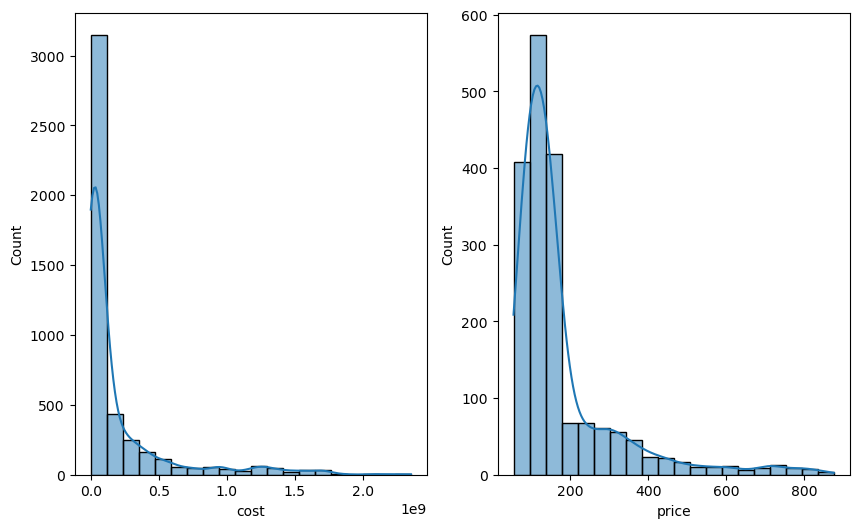

In [34]:
# In this histogram plot you can clearly see that it is the LOGNormal distribution 
fig, axes = plt.subplots(1, 2,figsize=(10, 6))
sns.histplot(df['cost'],bins=20, kde=True, ax=axes[0])
sns.histplot(df2['price'],bins=20, kde=True, ax=axes[1])

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='price', ylabel='Count'>

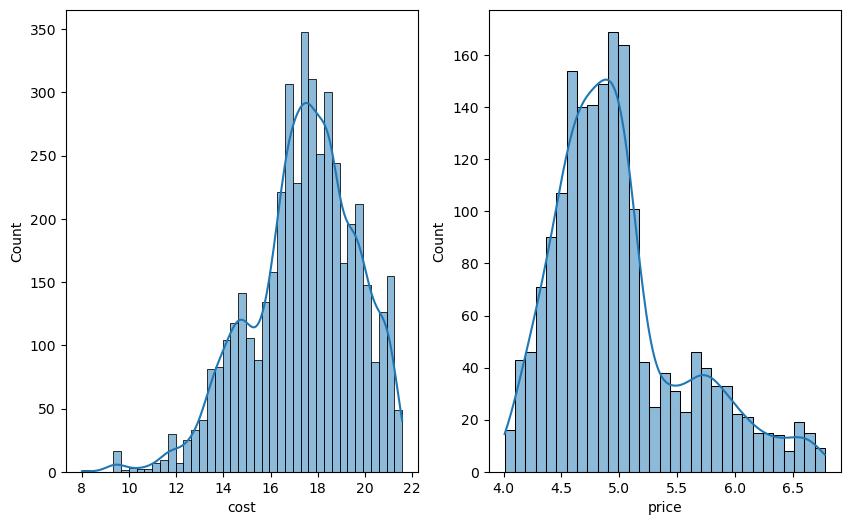

In [35]:
# NOw you see the distribution of price column is similar to the normal distribution becasue taking the log of the LOGnormal
# distribution convert it into normal distribution
fig, axes = plt.subplots(1, 2,figsize=(10, 6))
sns.histplot(np.log(df['cost']), kde=True, ax=axes[0])
sns.histplot(np.log(df2['price']), kde=True, ax=axes[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Alameda'),
  Text(1, 0, ' Contra Costa'),
  Text(2, 0, ' El Dorado'),
  Text(3, 0, ' Los Angeles'),
  Text(4, 0, ' Marin'),
  Text(5, 0, ' Napa'),
  Text(6, 0, ' Orange'),
  Text(7, 0, ' Placer'),
  Text(8, 0, ' Sacramento'),
  Text(9, 0, ' San Francisco'),
  Text(10, 0, ' San Mateo'),
  Text(11, 0, ' Santa Clara'),
  Text(12, 0, ' Solano'),
  Text(13, 0, ' Sonoma'),
  Text(14, 0, ' Ventura'),
  Text(15, 0, ' Yolo')])

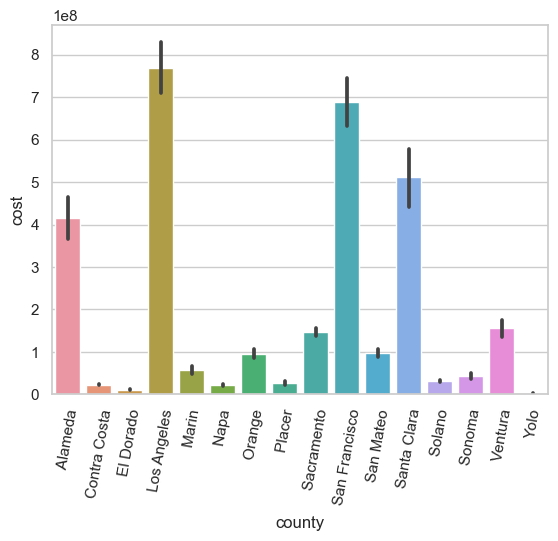

In [36]:
# This is the barplot of cost column with respect to counties
sns.set(style="whitegrid")
sns.barplot(x="county", y="cost", data=df)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All building and construction'),
  Text(1, 0, 'Building (excluding civil engineering)'),
  Text(2, 0, 'Residential building'),
  Text(3, 0, 'Non-residential building'),
  Text(4, 0, 'Civil engineering')])

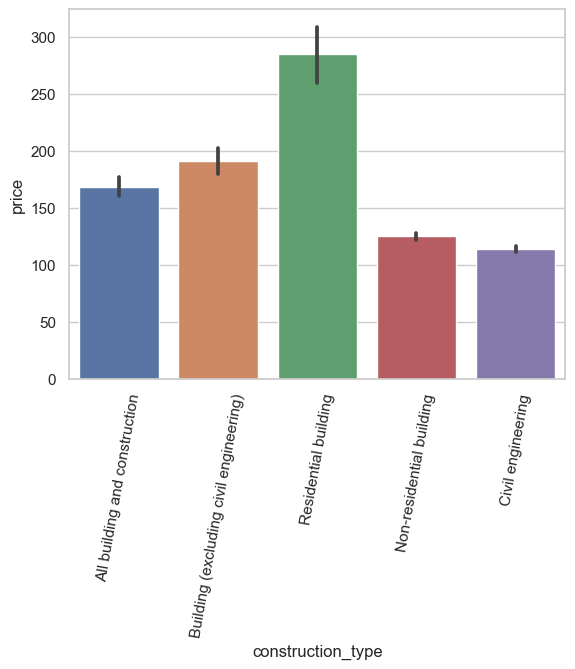

In [37]:
sns.set(style="whitegrid")
sns.barplot(x="construction_type", y="price", data=df2)
plt.xticks(rotation=80)

In [38]:
# In this boxxplot graph you can see the detail of all datasset 
figure = px.box(df, x='county', y='cost')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

You see the inflation in the values of the cost column so we are unable to understand the plots 
so now im going to take log of cost column for removing the inflation

In [39]:
log_df = df.copy()
log_df['cost'] = np.log(log_df['cost'])

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [40]:
# now you see this plot is much better from previous bosplot
figure = px.box(log_df, x='county', y='cost')
figure.update_layout(template='gridon',title='Construction cost respected by counties',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

In [41]:
# Bocplot for the second dataframe
figure = px.box(df2, x='construction_type', y='price')
figure.update_layout(template='gridon',title='Construction cost respected by counties',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

In [42]:
df

year         county  no_project        project_status          cost
0     2013        Alameda          45             In Review  5.091432e+07
1     2013        Alameda         126  Pending Construction  8.401825e+08
2     2013        Alameda         181       In Construction  9.943529e+08
3     2013        Alameda          81            In Closure  6.525593e+07
4     2013   Contra Costa          28             In Review  1.906792e+07
...    ...            ...         ...                   ...           ...
4539  2016        Ventura          11            In Closure  1.821026e+07
4540  2016           Yolo           6             In Review  4.405500e+06
4541  2016           Yolo           7  Pending Construction  6.807000e+05
4542  2016           Yolo          14       In Construction  6.919172e+06
4543  2016           Yolo           2            In Closure  3.159700e+05

[4544 rows x 5 columns]

In [43]:
total_by_year = {}
a=[]
b=[]
for i in df['year'].unique():
    filt =(df['year'] == i )
    x = df['no_project'][filt].sum()
    print(i," = ",x)
#     a.append(i)
#     b.append(x)
    total_by_year.update({i:x})  
# total_by_year.update({'year':a,'total':b})    

2013  =  37615
2014  =  134370
2015  =  143245
2016  =  56304


In [44]:
t_proj_by_year = pd.DataFrame(total_by_year,index=[1])

In [45]:
t_proj_by_year

2013    2014    2015   2016
1  37615  134370  143245  56304

<Axes: >

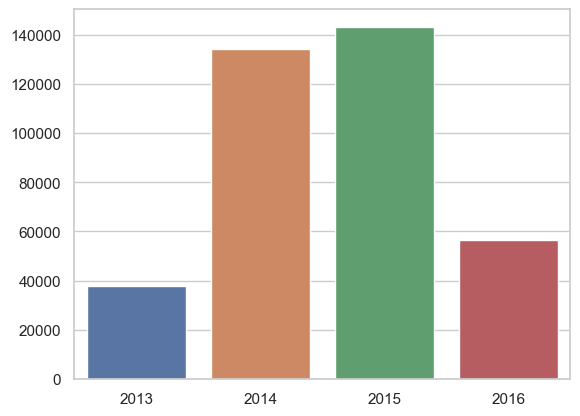

In [46]:
# This plot shows how many projects are done in USA by year, it shows that USA do 37615 construction project in 2013... etc
sns.barplot(data=t_proj_by_year)

In [47]:
uniq = df[['county','no_project']].groupby('county').mean()

In [48]:
uniq = uniq.transpose()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Alameda'),
  Text(1, 0, ' Contra Costa'),
  Text(2, 0, ' El Dorado'),
  Text(3, 0, ' Los Angeles'),
  Text(4, 0, ' Marin'),
  Text(5, 0, ' Napa'),
  Text(6, 0, ' Orange'),
  Text(7, 0, ' Placer'),
  Text(8, 0, ' Sacramento'),
  Text(9, 0, ' San Francisco'),
  Text(10, 0, ' San Mateo'),
  Text(11, 0, ' Santa Clara'),
  Text(12, 0, ' Solano'),
  Text(13, 0, ' Sonoma'),
  Text(14, 0, ' Ventura'),
  Text(15, 0, ' Yolo')])

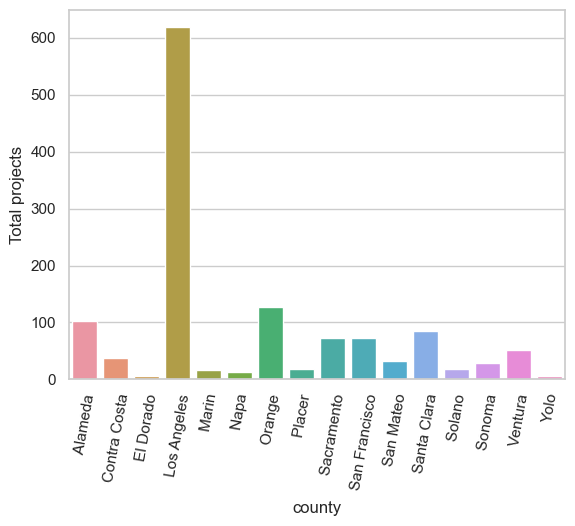

In [49]:
# This graph shows that how many number of projects are done by cities and you can clearly see that in Los Angeles more projects
# done byt the government of USA
sns.barplot(uniq)
plt.ylabel('Total projects')
plt.xticks(rotation=80)

# Graphical User Interface App by Tkinter

In [50]:
root= tk.Tk() 

In [51]:
figure1 = plt.Figure(figsize=(5,6), dpi=100)
ax1 = figure1.add_subplot(111)
bar1 = FigureCanvasTkAgg(figure1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
inter1 = df[['county','no_project']].groupby('county').sum()
inter1.plot(kind='bar', legend=True, ax=ax1)
ax1.set_title('No_projects respected to Counties')

Text(0.5, 1.0, 'No_projects respected to Counties')

In [52]:
figure2 = plt.Figure(figsize=(5,6), dpi=100)
ax2 = figure2.add_subplot(111)
line1 = FigureCanvasTkAgg(figure2, root)
line1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
inter2 = df[['project_status','no_project']].groupby('project_status').sum()
inter2.plot(kind='line', legend=True, ax=ax2, color='r',marker='o', fontsize=10)
ax2.set_title('No_project respect to status of proejct')

Text(0.5, 1.0, 'No_project respect to status of proejct')

In [53]:
root.mainloop()

Let create a chart which show number of projects with the project status with Tkinter graphical interface

In [54]:
def create_bar_chart():
    # choose feature in dropdown menu
    x_feature = x_variable.get()
    y_feature = y_variable.get()
    
    # Filter the dataframe based on choosed features
    filtered_df = df[[x_feature, y_feature]]
    
    # Group the data by the x_feature and calculate the sum of y_feature
    grouped_df = filtered_df.groupby(x_feature)[y_feature].sum()
    
    # Create the barchart
    plt.bar(grouped_df.index, grouped_df.values)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"Bar Chart: {y_feature} vs {x_feature}")
    plt.show()

In [55]:
bar = tk.Tk()
bar.title("Bar Chart")
bar.geometry("400x200")

''

In [56]:
# Create the dropdown menus
x_variable = ttk.Combobox(bar, values=df.columns)
x_variable.set("project_status")
x_variable.pack()

y_variable = ttk.Combobox(bar, values=df.columns)
y_variable.set("no_project")
y_variable.pack()

# Create the button to generate the bar chart
button = ttk.Button(bar, text="Generate Bar Chart", command=create_bar_chart)
button.pack()

# Run the Tkinter event loop
bar.mainloop()

# Hypothesis Testing

# One sample T-test

Lets do One_sample test on cost column of dataset.
Lets find out that the mean of population is different or same as the sample mean.

H0 (Null Hypothesis) = population mean is not different from sample mean
H1 (Alternate hypothesis) =  population mean is different from sample mean

In [57]:
# population mean
cost_mean = df['cost'].mean()
cost_mean

193292266.7294608

In [58]:
sample_size=1000
cost_sample=np.random.choice(df['cost'],sample_size)

In [59]:
# sample mean
cost_sample_mean = cost_sample.mean()

In [60]:
ttest,p_value=ttest_1samp(cost_sample,193292266.7294608)
print(p_value)

0.466223577391924


In [61]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


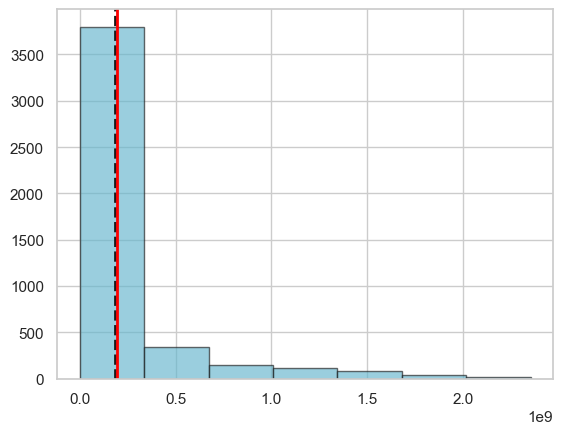

In [62]:
result = plt.hist(df['cost'], bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(cost_sample_mean, color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(cost_mean, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

I'm trying to do one sample testing on different dataset

In [63]:
df2.shape

(1840, 5)

In [64]:
price_mu = df2['price'].mean()
price_mu

176.63252246174923

In [65]:
s_size=500
price_sample=np.random.choice(df2['price'],s_size)

In [66]:
price_s_mu = price_sample.mean()

In [67]:
ttest,p_value=ttest_1samp(price_sample,176.63252246174923)
print(p_value)

0.14971222133128329


In [68]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


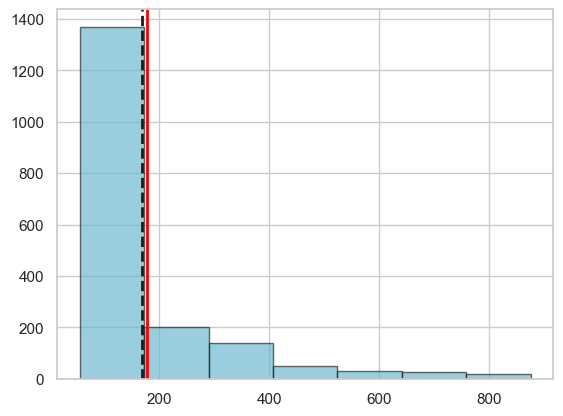

In [69]:
result = plt.hist(df2['price'], bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(price_s_mu, color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(price_mu, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

# Two sample t-test

In [70]:
dfx = df[(df.project_status=='In Review')]
dfy = df[(df.project_status=='In Construction')]

In [71]:
_,p_value = stats.ttest_ind(a=dfx['cost'], b=dfy['cost'])

In [72]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=dfx['cost'], b=dfy['cost'])

Ttest_indResult(statistic=-13.093885170610697, pvalue=8.076625404468019e-38)

In [73]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are rejecting null hypothesis


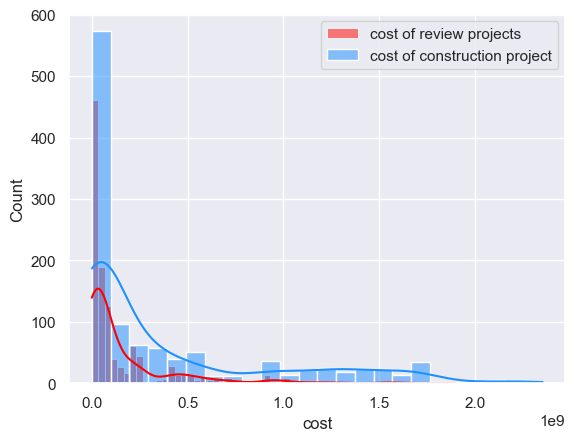

In [74]:
sns.set(style="darkgrid")
sns.histplot(data=dfx, x="cost", color="red", label="cost of review projects", kde=True)
sns.histplot(data=dfy, x="cost", color="dodgerblue", label="cost of construction project", kde=True)
plt.legend() 
plt.show()

# Two sample KS-test

In [75]:
grp1 = df[(df.project_status == 'In Review')]
grp2 = df[(df.project_status == 'In Construction')]

In [76]:
_,p_value = stats.ks_2samp(grp1.no_project, grp2.no_project)

In [77]:
stats.ks_2samp(grp1.no_project, grp2.no_project)

KstestResult(statistic=0.32130281690140844, pvalue=3.0054382294065935e-52, statistic_location=93, statistic_sign=1)

In [78]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


We conclude that the two samples of no_project do not come from the same population. We have sufficient evidence to reject $H_0$ 

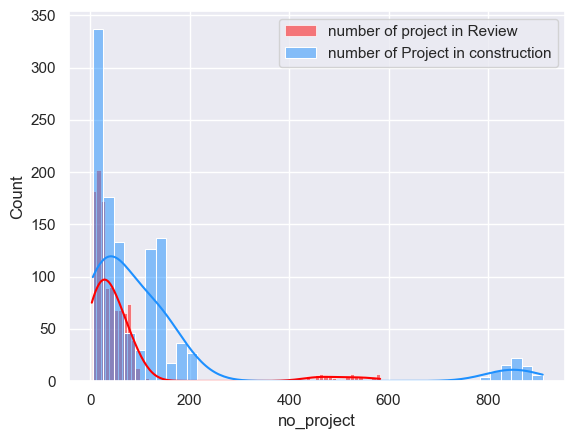

In [79]:
sns.set(style="darkgrid")
sns.histplot(data=grp1, x="no_project", color="red", label="number of project in Review", kde=True)
sns.histplot(data=grp2, x="no_project", color="dodgerblue", label="number of Project in construction", kde=True)
plt.legend() 
plt.show()

# Two pair test

In [80]:
cost_second_sample = np.random.choice(df['cost'],sample_size)

In [81]:
difference = pd.DataFrame({
    'cost_Sample': cost_sample,
    'second_cost_sample': cost_second_sample,
    'difference' : cost_sample - cost_second_sample
})

In [82]:
_,p_value=stats.ttest_rel(a=cost_sample, b=cost_second_sample)

In [83]:
p_value

0.6183927981238961

In [84]:
# it says that there is a maximum difference in the two particular groups
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


Apply on second dataset

In [85]:
df2.head()

statistic       stats_label  year                       construction_type  \
0  BEQ04C01  production_value  2000           All building and construction   
1  BEQ04C01  production_value  2000  Building (excluding civil engineering)   
2  BEQ04C01  production_value  2000                    Residential building   
3  BEQ04C01  production_value  2000                Non-residential building   
4  BEQ04C01  production_value  2000                       Civil engineering   

        price  
0  143.514977  
1  182.795802  
2  279.281551  
3  115.359508  
4   60.438887

In [86]:
value_2_sample = np.random.choice(df2['price'],s_size)

In [87]:
diff_ire = pd.DataFrame({
    'cost_Sample': price_sample,
    'second_cost_sample': value_2_sample,
    'difference' : price_sample - value_2_sample
})

In [88]:
_,p_value=stats.ttest_rel(a=price_sample, b=value_2_sample)

In [89]:
p_value

0.31829585274584504

In [90]:
# it says that there is a maximum difference in the two particular groups
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")
    

we are accepting null hypothesis


# Chi-square test

In [91]:
chi = pd.crosstab(df['county'], df['no_project'])

In [92]:
observed_values = chi.values

In [93]:
val = stats.chi2_contingency(chi)

In [94]:
val

Chi2ContingencyResult(statistic=17434.853569147566, pvalue=0.0, dof=6060, expected_freq=array([[0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       ...,
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625]]))

In [95]:
expected_values = val[3]

In [96]:
expected_values

array([[0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       ...,
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625]])

In [97]:
no_of_rows=len(chi.iloc[0:2,0])
no_of_columns=len(chi.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [98]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [99]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 321.6


In [100]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
     

critical_value: 3.841458820694124


In [101]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [102]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# ANOVA test

In [103]:
dfx = df[(df.project_status=='In Review')]
dfy = df[(df.project_status=='In Construction')]
dfz = df[(df.project_status=='In Closure')]
# Perform the one-way ANOVA test:
_,p_test = stats.f_oneway(dfx['no_project'], dfy['no_project'], dfz['no_project'])

In [104]:
stats.f_oneway(dfx['no_project'], dfy['no_project'], dfz['no_project'])

F_onewayResult(statistic=36.085250503228096, pvalue=3.1056196233023916e-16)

In [105]:
p_test

3.1056196233023916e-16

In [106]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


A plot to see why we have rejected  𝐻0

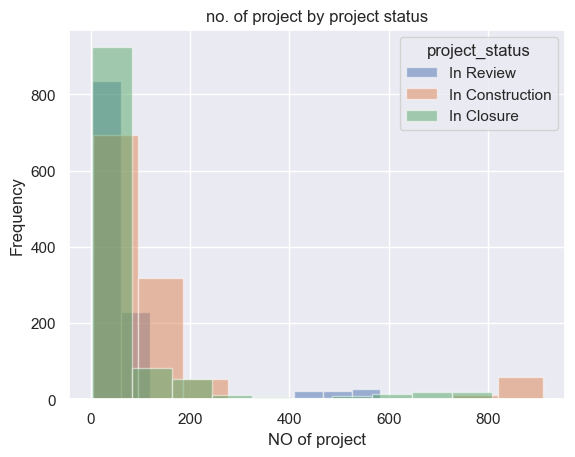

In [107]:
plt.hist(dfx['no_project'], alpha=0.5, label='In Review')
plt.hist(dfy['no_project'], alpha=0.5, label='In Construction')
plt.hist(dfz['no_project'], alpha=0.5, label='In Closure')

# Add plot title and axis labels
plt.title('no. of project by project status')
plt.xlabel('NO of project')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='project_status')

# Display plot
plt.show()

If we reject $H_0$ using an ANOVA test, Now we have to find out which means are differ so let find it out

 we can perform a Tukey-Kramer analysis to see which of the means differ from each other.

In [108]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [109]:
tukey = pairwise_tukeyhsd(endog=df['no_project'],
                          groups=df['project_status'],
                          alpha=0.05)

#display results
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1            group2        meandiff p-adj   lower    upper   reject
-----------------------------------------------------------------------------
     In Closure      In Construction  40.2967    0.0  24.1993   56.394   True
     In Closure            In Review -14.1813 0.1067 -30.2787    1.916  False
     In Closure Pending Construction -15.9305 0.0536 -32.0278   0.1669  False
In Construction            In Review  -54.478    0.0 -70.5754 -38.3806   True
In Construction Pending Construction -56.2271    0.0 -72.3245 -40.1297   True
      In Review Pending Construction  -1.7491 0.9924 -17.8465  14.3483  False
-----------------------------------------------------------------------------


# Model building and Evaluation

In [121]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.feature_selection import RFE

In [122]:
X = df.drop(['cost'], axis=1)
y = df['cost']

In [123]:
cat_col = X.select_dtypes(include=[object]).columns
cat_col

Index(['county', 'project_status'], dtype='object')

# one-hot encoding

In [124]:
x_dummies = pd.get_dummies(X[cat_col], prefix = ['county','project_status'])

In [125]:
x_dummies.shape

(4544, 20)

In [126]:
X.drop(['county','project_status'], axis=1, inplace =True)

In [127]:
X = pd.concat([X,x_dummies] ,axis=1)

Apply standardscalar on trainig set 

In [128]:
sc = StandardScaler()

In [129]:
x_scalar = sc.fit_transform(X)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.20, random_state =5)

In [131]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3635, 22), (3635,), (909, 22), (909,))

In [132]:
features = X

# Random Forest regressor

In [133]:
rf = RandomForestRegressor(criterion='absolute_error')

estimator =  5
Training accuracy = 0.9886607842318809
Testing accuracy = 0.9567156815481426
Accuracy After cross_validation:  0.9532798607862001
estimator =  10
Training accuracy = 0.9903724324427845
Testing accuracy = 0.9558022429968
Accuracy After cross_validation:  0.9564709185252488
estimator =  15
Training accuracy = 0.9909600413922885
Testing accuracy = 0.9596098761049998
Accuracy After cross_validation:  0.9594794497891197
estimator =  20
Training accuracy = 0.9919674522422745
Testing accuracy = 0.957923192615601
Accuracy After cross_validation:  0.9582475748672303
estimator =  25
Training accuracy = 0.9917956775364766
Testing accuracy = 0.9593621132858309
Accuracy After cross_validation:  0.9588862584066536
estimator =  30
Training accuracy = 0.9916496246105565
Testing accuracy = 0.9552679702087955
Accuracy After cross_validation:  0.9593551643536202
estimator =  35
Training accuracy = 0.9920789203407561
Testing accuracy = 0.9570919885018928
Accuracy After cross_validation:  0.

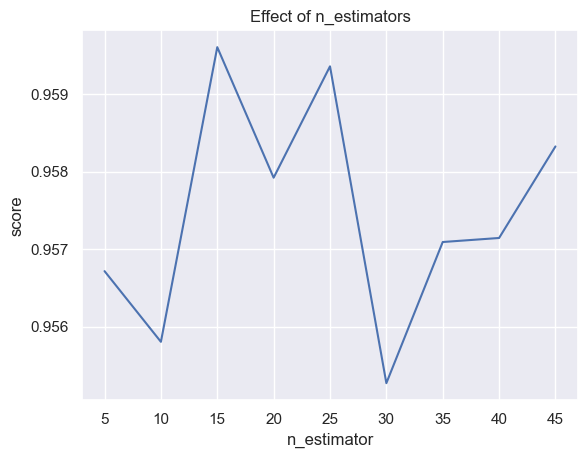

In [134]:
# i set n_estimator/Decision trees between 50 to 200  and checking the difference
estimators = np.arange(5,50, 5)

scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    t = rf.score(X_train,y_train)
    s = rf.score(X_test, y_test)
    score = cross_val_score(rf,X_train,y_train,cv = 5)
    print('estimator = ',n)
    print('Training accuracy =',t)
    print('Testing accuracy =',s)
    print("Accuracy After cross_validation: ", score.mean())
    scores.append(s)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [135]:
from sklearn.feature_selection import RFE
rf.fit(X_train, y_train)

rfe = RFE(rf, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [136]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('no_project', True, 1),
 ('county_ Alameda', False, 3),
 ('county_ Contra Costa', False, 8),
 ('county_ El Dorado', False, 13),
 ('county_ Los Angeles', False, 10),
 ('county_ Marin', False, 4),
 ('county_ Napa', False, 11),
 ('county_ Orange', True, 1),
 ('county_ Placer', False, 7),
 ('county_ Sacramento', True, 1),
 ('county_ San Francisco', True, 1),
 ('county_ San Mateo', False, 5),
 ('county_ Santa Clara', True, 1),
 ('county_ Solano', False, 9),
 ('county_ Sonoma', False, 6),
 ('county_ Ventura', False, 2),
 ('county_ Yolo', False, 12),
 ('project_status_In Closure', True, 1),
 ('project_status_In Construction', True, 1),
 ('project_status_In Review', True, 1),
 ('project_status_Pending Construction', True, 1)]

# Decision Tree Regressor

Accuracy before cross_validation:  0.9453563355207043
Accuracy After cross_validation:  0.952609766547815
Mean Square Error:  6302269307296249.0
Mean Absolute Error:  22298825.89300316


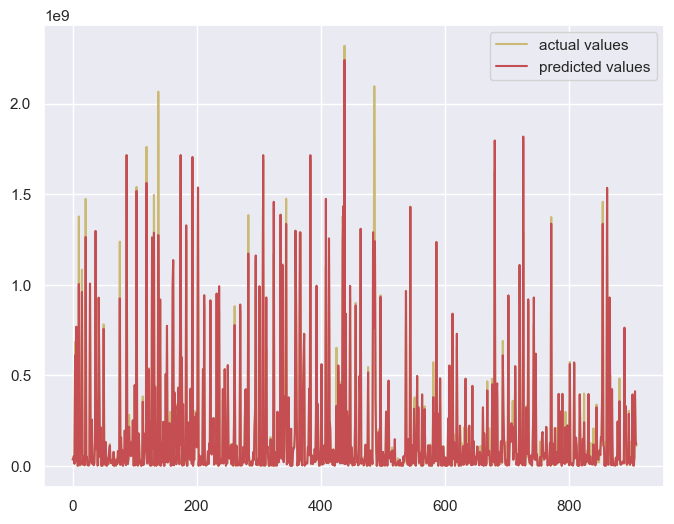

In [137]:
# Decision Tree
dt = DecisionTreeRegressor(criterion='squared_error',splitter = 'random')


dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)


score = cross_val_score(dt,X_train,y_train,cv = 5)

print("Accuracy before cross_validation: ",r2_score(y_test,dt_pred))
print("Accuracy After cross_validation: ", score.mean())
print("Mean Square Error: ", mean_squared_error(y_test,dt_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,dt_pred))


# check difference between actual target values and predicted values by graph
plt.figure(figsize=(8, 6))
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='y', label="actual values")
plt.plot([i for i in range(len(y_test))],dt_pred, c='r',label="predicted values")
plt.legend()
plt.show()

# Random SearchCV

In [138]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = [1,3,5,8,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 11,16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 9,12,22]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':["squared_error", "absolute_error", "poisson"]}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': [1, 3, 5, 8, 10], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'min_samples_split': [2, 4, 11, 16], 'min_samples_leaf': [1, 5, 9, 12, 22], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [139]:
rf2 = RandomForestRegressor()
rf_searchcv=RandomizedSearchCV(estimator=rf2,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_searchcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': [1, 3, 5, 8, 10],
                                        'min_samples_leaf': [1, 5, 9, 12, 22],
                                        'min_samples_split': [2, 4, 11, 16],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=100, verbose=2)

In [140]:
pred = rf_searchcv.predict(X_test)

In [141]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
print("Accuracy : ",r2_score(y_test,pred), " MSE :",mse, " MAE", mae)
print("Train accuracy",rf_searchcv.score(X_train,y_train))
print("Test accuracy",rf_searchcv.score(X_test,y_test))

Accuracy :  0.9633013208006842  MSE : 4232603390348981.5  MAE 23017234.787439328
Train accuracy 0.9895729773134389
Test accuracy 0.9633013208006842


In [142]:
# show best parameters for random forest regressor
rf_searchcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 73,
 'criterion': 'squared_error'}

In [143]:
best_estimator = rf_searchcv.best_estimator_

In [144]:
scores = rf_searchcv.cv_results_
scores_table = pd.DataFrame(scores)
scores_table

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.029673      0.000472         0.002667    4.716516e-04   
1        0.024005      0.000817         0.002667    9.424598e-04   
2        2.813297      0.043876         0.022005    3.371748e-07   
3        0.198713      0.005557         0.012333    4.719893e-04   
4        3.714167      0.034001         0.033007    4.243794e-03   
5        0.318403      0.003684         0.025005    9.798072e-07   
6        2.590581      0.087118         0.014670    4.718761e-04   
7        4.442330      0.055974         0.015003    5.150430e-07   
8        0.305068      0.034106         0.002668    4.721577e-04   
9        0.976219      0.008527         0.006668    9.425721e-04   
10       0.158368      0.007719         0.011002    1.946680e-07   
11       0.529786      0.014525         0.002667    4.715390e-04   
12       0.334739      0.017313         0.020338    4.715390e-04   
13       0.367082      0.000817         0.023005    1.123916e-07   
14       2.252839      0.031602         0.016670    4.714266e-04   
15       4.417993      0.010679         0.024673    9.448200e-04   
16       2.636925      0.056919         0.007335    4.715952e-04   
17       0.023337      0.000471         0.002001    1.946680e-07   
18       0.269059      0.002945         0.019672    4.718199e-04   
19       1.900092      0.046468         0.009002    8.177029e-04   
20       0.296399      0.003093         0.019003    4.495664e-07   
21       4.485917      0.155843         0.014094    1.278458e-04   
22       0.423093      0.007791         0.026673    9.429655e-04   
23       0.966883      0.009536         0.008003    5.150430e-07   
24       0.182707      0.004498         0.011670    4.715392e-04   
25       0.459769      0.005438         0.027673    9.435838e-04   
26       2.775624      0.058432         0.012669    4.708104e-04   
27       0.023005      0.000817         0.002334    4.715951e-04   
28      10.842773      0.136037         0.039008    1.414111e-03   
29       0.344077      0.002829         0.021338    4.717079e-04   
30       2.606252      0.008656         0.015003    2.973602e-07   
31       0.445432      0.001886         0.034008    8.169243e-04   
32       0.274726      0.011787         0.017670    9.425721e-04   
33       0.204377      0.002055         0.015004    8.170214e-04   
34       0.077683      0.004110         0.005668    4.719330e-04   
35       0.419760      0.008733         0.029007    1.415235e-03   
36       0.562791      0.031800         0.003003    6.743496e-07   
37       0.467104      0.004243         0.023338    4.716516e-04   
38       3.993230      0.100131         0.011336    4.716514e-04   
39       6.592815      0.126439         0.049012    6.685171e-03   
40       4.672384      0.023618         0.030341    2.624610e-03   
41       0.384753      0.064110         0.020672    1.246980e-03   
42       5.876321      0.040109         0.018671    9.428531e-04   
43       0.164036      0.009417         0.011002    6.257699e-07   
44       5.454898      0.145023         0.018002    8.085560e-04   
45       0.205378      0.005251         0.002667    4.715390e-04   
46       0.064346      0.008263         0.004668    4.721575e-04   
47       0.077350      0.008996         0.005001    4.495664e-07   
48       0.187042      0.013493         0.014669    1.700626e-03   
49       2.335523      0.195246         0.007335    1.247830e-03   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                  10                       2                      5   
1                  10                       2                     12   
2                 157                      11                     12   
3                  73                      11                      1   
4                 200                      16                      9   
5                 200                      16                      5   
6                  94          

# Grid SearchCV

In [145]:
# Best parameters from Random Search CV
rf_searchcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 73,
 'criterion': 'squared_error'}

In [146]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
max_features = [1,3,5]
max_depth = [2,7,12]
min_samples_split = [1, 4]
min_samples_leaf = [3, 8]


param_grid = {
    'criterion': ["squared_error", "absolute_error", "poisson"],
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators 
}
print(param_grid)

{'criterion': ['squared_error', 'absolute_error', 'poisson'], 'max_depth': [2, 7, 12], 'max_features': [1, 3, 5], 'min_samples_leaf': [3, 8], 'min_samples_split': [1, 4], 'n_estimators': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50]}


In [147]:
rf3 = RandomForestRegressor()
rf_gridcv = GridSearchCV(rf3,param_grid=param_grid,cv=2,verbose=2,n_jobs=-1)

rf_gridcv.fit(X_train,y_train)

Fitting 2 folds for each of 2160 candidates, totalling 4320 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 7, 12], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [3, 8],
                         'min_samples_split': [1, 4],
                         'n_estimators': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24,
                                          26, 29, 31, 34, 37, 39, 42, 44, 47,
                                          50]},
             verbose=2)

In [148]:
grid_pred = rf_searchcv.predict(X_test)

In [149]:
mse = metrics.mean_absolute_error(y_test,grid_pred)
print("Accuracy : ",r2_score(y_test,grid_pred), " MSE :",mse)
print("Train accuracy",rf_searchcv.score(X_train,y_train))
print("Test accuracy",rf_searchcv.score(X_test,y_test))

Accuracy :  0.9633013208006842  MSE : 23017234.787439328
Train accuracy 0.9895729773134389
Test accuracy 0.9633013208006842


In [150]:
print(rf_gridcv.best_params_)
print(rf_searchcv.best_params_)

{'criterion': 'squared_error', 'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 1, 'n_estimators': 47}
{'n_estimators': 73, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 73, 'criterion': 'squared_error'}


In [151]:
scores = rf_gridcv.cv_results_
scores_table = pd.DataFrame(scores)
scores_table

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.005001  9.988546e-04         0.002000    2.861023e-06   
1          0.009998  2.741814e-06         0.001999    1.192093e-06   
2          0.018999  3.999591e-03         0.002000    2.384186e-07   
3          0.018502  5.002022e-04         0.002503    4.963875e-04   
4          0.062510  5.500793e-03         0.002001    9.536743e-07   
...             ...           ...              ...             ...   
2155       0.094019  2.384186e-07         0.008504    4.988909e-04   
2156       0.097020  1.002073e-03         0.009003    1.002431e-03   
2157       0.103025  1.999378e-03         0.008503    5.004406e-04   
2158       0.106026  3.000259e-03         0.008002    2.384186e-07   
2159       0.102522  1.500726e-03         0.008014    2.384186e-07   

     param_criterion param_max_depth param_max_features  \
0      squared_error               2                  1   
1      squared_error               2                  1   
2      squared_error               2                  1   
3      squared_error               2                  1   
4      squared_error               2                  1   
...              ...             ...                ...   
2155         poisson              12                  5   
2156         poisson              12                  5   
2157         poisson              12                  5   
2158         poisson              12                  5   
2159         poisson              12                  5   

     param_min_samples_leaf param_min_samples_split param_n_estimators  \
0                         3                       1                  1   
1                         3                       1                  3   
2                         3                       1                  6   
3                         3                       1                  8   
4                         3                       1                 11   
...                     ...                     ...                ...   
2155                      8                       4                 39   
2156                      8                       4                 42   
2157                      8                       4                 44   
2158                      8                       4                 47   
2159                      8                       4                 50   

                                                 params  split0_test_score  \
0     {'criterion': 'squared_error', 'max_depth': 2,...           0.163573   
1     {'criterion': 'squared_error', 'max_depth': 2,...           0.152025   
2     {'criterion': 'squared_error', 'max_depth': 2,...           0.123830   
3     {'criterion': 'squared_error', 'max_depth': 2,...           0.073786   
4     {'criterion': 'squared_error', 'max_depth': 2,...           0.142335   
...                                                 ...                ...   
2155  {'criterion': 'poisson', 'max_depth': 12, 'max...           0.887178   
2156  {'criterion': 'poisson', 'max_depth': 12, 'max...           0.881899   
2157  {'criterion': 'poisson', 'max_depth': 12, 'max...           0.873111   
2158  {'criterion': 'poisson', 'max_depth': 12, 'max...           0.868405   
2159  {'criterion': 'poisson', 'max_depth': 12, 'max...           0.874598   

      split1_test_score  mean_test_score  std_test_score  rank_test_score  
0              0.020484         0.092028        0.071544             2068  
1              0.043282         0.097653        0.054372             2065  
2              0.286641         0.205235        0.081406             1883  
3              0.242843         0.158315        0.084528             2021  
4              0.249023         0.195679        0.053344             1915  
...                 ...              ...             ...              ...  
2155           0.879970         0.883574        0.003604              251  
2156           0.86442

# Ridge Regression

In [152]:
ridge_para = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridge_para.fit(X_train, y_train)

ridge = ridge_para.best_estimator_
print("Training Accuracy: ",ridge.score(X_train,y_train))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training Accuracy:  0.6589801847067578


In [153]:
ridge_pred = ridge.predict(X_test)
print(' ------Testing Statistics-------')
print("Testing Accuracy: ",ridge.score(X_test,y_test))
print("Mean Square Error: ", mean_squared_error(y_test,ridge_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,ridge_pred))

 ------Testing Statistics-------
Testing Accuracy:  0.631208695119531
Mean Square Error:  4.253415549073498e+16
Mean Absolute Error:  130326595.34800482


# Lasso Regression

In [154]:
lasso_para = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1,2]
                    }, verbose=1)

lasso_para.fit(X_train, y_train)

lasso = lasso_para.best_estimator_
print("Training Accuracy: ",lasso.score(X_train,y_train))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+19, tolerance: 3.921e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+19, tolerance: 3.907e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+19, tolerance: 3.870e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\si

Training Accuracy:  0.6589817984145465


C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.625e+19, tolerance: 4.835e+16



In [155]:
lasso_pred = lasso.predict(X_test)
print(' ------Testing Statistics-------')
print("Testing Accuracy: ",lasso.score(X_test,y_test))
print("Mean Square Error: ", mean_squared_error(y_test,lasso_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,lasso_pred))

 ------Testing Statistics-------
Testing Accuracy:  0.6311462020857366
Mean Square Error:  4.254136305875875e+16
Mean Absolute Error:  130309485.84875537


# Linear Regression

Accuracy before cross_validation:  0.6312119305267454
Accuracy After cross_validation:  0.6555234707154379
Mean Square Error:  4.253378233846237e+16
Mean Absolute Error:  130411285.34170182


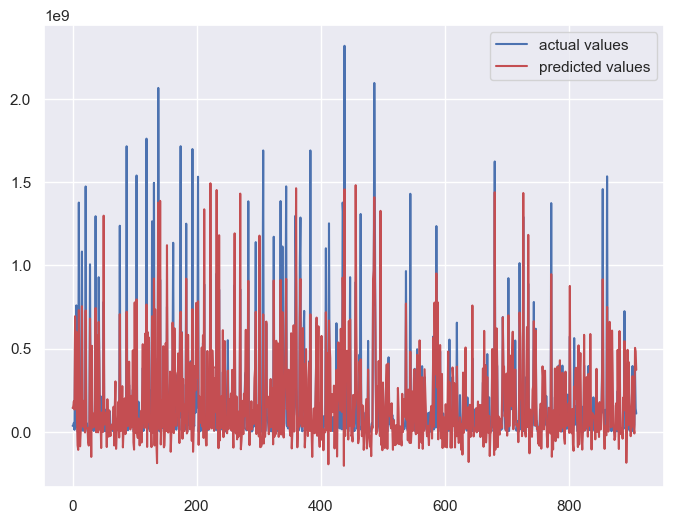

In [162]:
lg = LinearRegression()

lg.fit(X_train,y_train)

lg_pred = lg.predict(X_test)
# applying cross-valiation 
score = cross_val_score(lg,X_train,y_train,cv = 5)

print("Accuracy before cross_validation: ",r2_score(y_test,lg_pred))
print("Accuracy After cross_validation: ", score.mean())
print("Mean Square Error: ", mean_squared_error(y_test,lg_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,lg_pred))


# check difference between actual target values and predicted values by graph
plt.figure(figsize=(8, 6))
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='b', label="actual values")
plt.plot([i for i in range(len(y_test))],lg_pred, c='r',label="predicted values")
plt.legend()
plt.show()

# Sentimental Analysis on hotel reviews

In [31]:
hotel = pd.read_csv('hotel_dataset.csv')

In [3]:
import pymongo
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

In [23]:
url = "mongodb://localhost:27017"

# Create a new client and connect to the server
client = MongoClient(url, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [24]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
database_name = 'Hotel'
collection_name = 'coll_1'

# Create a database and a collection
db = client[database_name]
collection = db[collection_name]

In [25]:
# Convert the dataframe to a list of dictionaries
data_list = hotel.to_dict(orient='records')

# Insert the data into the collection
collection.insert_many(data_list)

In [26]:
database_name = 'Hotel'
collection_name = 'coll_1'

# Defining database and a collection variable to fetch data from Mongo DB
db = client[database_name]
collection = db[collection_name]

In [27]:
# Importing stored data from mongo DB to list variable ,documents
documents = list(collection.find())

In [28]:
documents

[{'_id': ObjectId('646df18c248bd3d86a2cf64c'),
  'User_ID': 'id10326',
  'Description': "The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.",
  'Browser_Used': 'Edge',
  'Device_Used': 'Mobile',
  'Is_Response': 'not happy'},
 {'_id': ObjectId('646df18c248bd3d86a2cf64d'),
  'User_ID': 'id10327',
  'Description': "I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of 

In [29]:
hotel_db = pd.DataFrame(documents)

In [34]:
hotel_db

_id  User_ID  \
0      646df18c248bd3d86a2cf64c  id10326   
1      646df18c248bd3d86a2cf64d  id10327   
2      646df18c248bd3d86a2cf64e  id10328   
3      646df18c248bd3d86a2cf64f  id10329   
4      646df18c248bd3d86a2cf650  id10330   
...                         ...      ...   
38927  646df18c248bd3d86a2d8e5b  id49253   
38928  646df18c248bd3d86a2d8e5c  id49254   
38929  646df18c248bd3d86a2d8e5d  id49255   
38930  646df18c248bd3d86a2d8e5e  id49256   
38931  646df18c248bd3d86a2d8e5f  id49257   

                                             Description       Browser_Used  \
0      The room was kind of clean but had a VERY stro...               Edge   
1      I stayed at the Crown Plaza April -- - April -...  Internet Explorer   
2      I booked this hotel through Hotwire at the low...            Mozilla   
3      Stayed here with husband and sons on the way t...   InternetExplorer   
4      My girlfriends and I stayed here to celebrate ...               Edge   
...                                                  ...                ...   
38927  We arrived late at night and walked in to a ch...               Edge   
38928  The only positive impression is location and p...   InternetExplorer   
38929  Traveling with friends for shopping and a show...            Firefox   
38930  The experience was just ok. We paid extra for ...             Chrome   
38931  The Westin is a wonderfully restored grande da...            Mozilla   

      Device_Used Is_Response  
0          Mobile   not happy  
1          Mobile   not happy  
2          Tablet   not happy  
3         Desktop       happy  
4          Tablet   not happy  
...           ...         ...  
38927     Desktop       happy  
38928      Mobile   not happy  
38929      Mobile   not happy  
38930     Desktop   not happy  
38931     Desktop       happy  

[38932 rows x 6 columns]

In [38]:
hotel_db.describe().transpose()

count unique                                                top  \
_id           38932  38932                           646df18c248bd3d86a2cf64c   
User_ID       38932  38932                                            id10326   
Description   38932  38932  The room was kind of clean but had a VERY stro...   
Browser_Used  38932     11                                            Firefox   
Device_Used   38932      3                                            Desktop   
Is_Response   38932      2                                              happy   

               freq  
_id               1  
User_ID           1  
Description       1  
Browser_Used   7367  
Device_Used   15026  
Is_Response   26521

In [39]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

hotel_db.isna().sum()

_id             0
User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


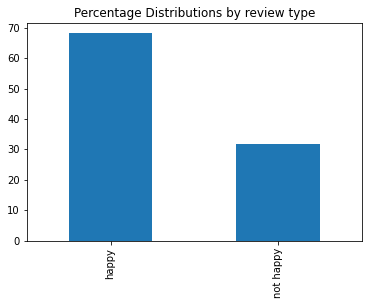

In [41]:
### Checking for the Distribution of Default ###
print('Percentage for default\n')
print(round(hotel_db['Is_Response'].value_counts(normalize=True)*100,2))
round(hotel_db['Is_Response'].value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [42]:
#Removing columns
hotel_db.drop(columns = ['_id','User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [43]:
hotel_db

Description Is_Response
0      The room was kind of clean but had a VERY stro...   not happy
1      I stayed at the Crown Plaza April -- - April -...   not happy
2      I booked this hotel through Hotwire at the low...   not happy
3      Stayed here with husband and sons on the way t...       happy
4      My girlfriends and I stayed here to celebrate ...   not happy
...                                                  ...         ...
38927  We arrived late at night and walked in to a ch...       happy
38928  The only positive impression is location and p...   not happy
38929  Traveling with friends for shopping and a show...   not happy
38930  The experience was just ok. We paid extra for ...   not happy
38931  The Westin is a wonderfully restored grande da...       happy

[38932 rows x 2 columns]

In [44]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [45]:
# Let's take a look at the updated text
hotel_db['cleaned_description'] = pd.DataFrame(hotel_db['Description'].apply(cleaned1))
hotel_db.head()

Description Is_Response  \
0  The room was kind of clean but had a VERY stro...   not happy   
1  I stayed at the Crown Plaza April -- - April -...   not happy   
2  I booked this hotel through Hotwire at the low...   not happy   
3  Stayed here with husband and sons on the way t...       happy   
4  My girlfriends and I stayed here to celebrate ...   not happy   

                                 cleaned_description  
0  the room was kind of clean but had a very stro...  
1  i stayed at the crown plaza april   april   th...  
2  i booked this hotel through hotwire at the low...  
3  stayed here with husband and sons on the way t...  
4  my girlfriends and i stayed here to celebrate ...

In [46]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [47]:
# Let's take a look at the updated text
hotel_db['complete_cleaned'] = pd.DataFrame(hotel_db['cleaned_description'].apply(cleaned2))
hotel_db.head(10)

Description Is_Response  \
0  The room was kind of clean but had a VERY stro...   not happy   
1  I stayed at the Crown Plaza April -- - April -...   not happy   
2  I booked this hotel through Hotwire at the low...   not happy   
3  Stayed here with husband and sons on the way t...       happy   
4  My girlfriends and I stayed here to celebrate ...   not happy   
5  We had - rooms. One was very nice and clearly ...       happy   
6  My husband and I have stayed in this hotel a f...   not happy   
7  My wife & I stayed in this glorious city a whi...       happy   
8  My boyfriend and I stayed at the Fairmont on a...       happy   
9  Wonderful staff, great location, but it was de...   not happy   

                                 cleaned_description  \
0  the room was kind of clean but had a very stro...   
1  i stayed at the crown plaza april   april   th...   
2  i booked this hotel through hotwire at the low...   
3  stayed here with husband and sons on the way t...   
4  my girlfriends and i stayed here to celebrate ...   
5  we had  rooms one was very nice and clearly ha...   
6  my husband and i have stayed in this hotel a f...   
7  my wife  i stayed in this glorious city a whil...   
8  my boyfriend and i stayed at the fairmont on a...   
9  wonderful staff great location but it was defi...   

                                    complete_cleaned  
0  the room was kind of clean but had a very stro...  
1  i stayed at the crown plaza april   april   th...  
2  i booked this hotel through hotwire at the low...  
3  stayed here with husband and sons on the way t...  
4  my girlfriends and i stayed here to celebrate ...  
5  we had  rooms one was very nice and clearly ha...  
6  my husband and i have stayed in this hotel a f...  
7  my wife  i stayed in this glorious city a whil...  
8  my boyfriend and i stayed at the fairmont on a...  
9  wonderful staff great location but it was defi...

In [51]:
X_review = hotel_db.complete_cleaned
y_review = hotel_db.Is_Response

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_review, y_review, test_size = 0.2, random_state = 5)


In [156]:
tvec = TfidfVectorizer()
lgf = LogisticRegression()

In [157]:
model = Pipeline([('vectorizer',tvec),('classifier',lgf)])

model.fit(Xr_train, yr_train)


from sklearn.metrics import confusion_matrix

pred = model.predict(Xr_test)

confusion_matrix(pred, yr_test)

array([[4988,  550],
       [ 324, 1925]], dtype=int64)

In [158]:
print("Accuracy : ", metrics.accuracy_score(pred, yr_test))
print("Precision : ", metrics.precision_score(pred, yr_test, average = 'weighted'))
print("Recall : ", metrics.recall_score(pred, yr_test, average = 'weighted'))

Accuracy :  0.8877616540387826
Precision :  0.8924409379309111
Recall :  0.8877616540387826


In [159]:
# Try on different input
example = ["Rooms are very small"]
result = model.predict(example)

print(result)

['not happy']
